In [137]:
#libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [138]:
import pandas as pd

data = pd.read_csv('data_assignment2_1.csv')
data.head()

,response,treatment,age,party
0,0,0,28.0,d
1,1,0,54.0,g
2,1,0,44.0,a
3,0,0,77.0,a
4,0,0,44.0,a


### Problem 1

In [139]:
data.isna().sum()

response       0
treatment      0
age          113
party          0
dtype: int64

In [140]:
df = data.dropna()

In [141]:
#define dummy variable
df.loc[df['age'] > 49, 'Mature'] = 1
df.loc[df['age'] < 50, 'Mature'] = 0 

In [142]:
df.head()

,response,treatment,age,party,Mature
0,0,0,28.0,d,0.0
1,1,0,54.0,g,1.0
2,1,0,44.0,a,0.0
3,0,0,77.0,a,1.0
4,0,0,44.0,a,0.0


In [143]:
#Check hypo 1
result_q1 = sm.ols(formula="response ~ treatment + Mature + treatment * Mature", 
                   data = df).fit()
print(result_q1.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     2181.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:34:25   Log-Likelihood:                -18126.
No. Observations:               36388   AIC:                         3.626e+04
Df Residuals:                   36384   BIC:                         3.629e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4373      0.004  

In [144]:
df.treatment.value_counts()

1    19388
0    17000
Name: treatment, dtype: int64

In [145]:
#bootstrap
younger = []
older = []
difference = []
np.random.seed(123)
for i in range(2000):
    p = np.repeat(sum(df.treatment)/len(df.treatment), len(np.where(df.treatment == 0)[0]))
    p = np.append(p, np.repeat(1 - sum(df.treatment)/len(df.treatment), len(np.where(df.treatment == 1)[0])))
    index = np.random.choice(range(len(df.treatment)), len(df.treatment), replace = True, p = p/sum(p))
    model = sm.ols(formula="response ~ treatment + Mature + treatment * Mature", 
                   data = df.iloc[index,]).fit()
    younger.append(model.params['treatment'])
    older.append(model.params['treatment'] + model.params['treatment:Mature'])
    difference.append(model.params['treatment:Mature'])
    
print("The Treatment Effect of younger participants (49 and below): " + str(round(model.params['treatment'], 3)))
print("The Treatment Effect of older  participants(those 50 or older): " + str(round(model.params['treatment'] + model.params['treatment:Mature'], 3)))
print("The difference in Treatment Effects: " + str(round(model.params['treatment:Mature'], 3)))
print("The Treatment of younger participants (49 and below) standard error: " + str(round(np.std(younger), 3)))
print("The Treatment of older  participants(those 50 or older) standard error: " + str(round(np.std(older), 3)))
print("The difference in Treatment Effects standard error: " + str(round(np.std(difference), 3)))

The Treatment Effect of younger participants (49 and below): -0.355
The Treatment Effect of older  participants(those 50 or older): -0.318
The difference in Treatment Effects: 0.036
The Treatment of younger participants (49 and below) standard error: 0.006
The Treatment of older  participants(those 50 or older) standard error: 0.007
The difference in Treatment Effects standard error: 0.009


In [146]:
#Q.2
result_q2 = sm.ols(formula="response ~ treatment + age + treatment * age", 
                   data = df).fit()
print(result_q2.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     2180.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:36:11   Log-Likelihood:                -18127.
No. Observations:               36388   AIC:                         3.626e+04
Df Residuals:                   36384   BIC:                         3.630e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4413      0.009     50.964

In [147]:
#q.3
df.party.unique()

array(['d', 'g', 'a', 'b', 'f', 'e', 'c', 'i', 'h'], dtype=object)

In [148]:
np.random.seed(123)
n = len(df)
index = np.random.choice(range(n), round(n/2), replace = False)
model_p1 = sm.ols(formula="response ~ treatment + party + age + treatment*party", 
                  data = df.iloc[-index,]).fit()
model_p2 = sm.ols(formula="response ~ treatment + party + age + treatment*party", 
                  data = df.iloc[index,]).fit()
print(model_p1.summary())
print(model_p2.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     215.1
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:36:16   Log-Likelihood:                -8786.2
No. Observations:               18194   AIC:                         1.761e+04
Df Residuals:                   18175   BIC:                         1.776e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2959 

In [149]:
#bootstrap

party_e =[]
party_f =[]
party_g =[]
for i in range(2000):
    p = np.repeat(sum(df.iloc[index].treatment)/len(df.iloc[index].treatment), 
                  len(np.where(df.iloc[index].treatment == 0)[0]))
    p = np.append(p, np.repeat(1 - sum(df.iloc[index].treatment)/len(df.iloc[index].treatment),
                               len(np.where(df.iloc[index].treatment == 1)[0])))
    index_bs = np.random.choice(range(len(df.iloc[index].treatment)), 
                                len(df.iloc[index].treatment), 
                                replace = True, p = p/sum(p))
    model_bs = sm.ols(formula="response ~ treatment + party + treatment*party", 
                      data = df.iloc[index].iloc[index_bs,]).fit()
    party_e.append(model_bs.params['treatment:party[T.e]'])
    party_f.append(model_bs.params['treatment:party[T.f]'])
    party_g.append(model_bs.params['treatment:party[T.g]'])

print("The Treatment Effect of party e group: " + str(round(model_bs.params['treatment:party[T.e]'], 3)))
print("The Treatment Effect of party f group: " + str(round(model_bs.params['treatment:party[T.f]'], 3)))
print("The Treatment Effect of party g group: " + str(round(model_bs.params['treatment:party[T.g]'], 3)))

print("The standard error of party e group: " + str(round(np.std(party_e), 3)))
print("The standard error of party f group: " + str(round(np.std(party_f), 3)))
print("The standard error of party g group: " + str(round(np.std(party_g), 3)))

The Treatment Effect of party e group: -0.148
The Treatment Effect of party f group: -0.142
The Treatment Effect of party g group: -0.164
The standard error of party e group: 0.025
The standard error of party f group: 0.021
The standard error of party g group: 0.025


### Problem 2

In [119]:
#q.1
data_dd = pd.read_csv('data_assignment2_2.csv')
data_dd.head()

,revenue,treatment,compliance,age,gender,zone,signal
0,6.878037,1,0,27,m,2,0.071595
1,16.911885,1,0,62,o,4,0.162294
2,24.212034,1,0,31,f,2,0.099369
3,11.106823,1,0,42,m,7,-0.080129
4,22.507852,1,0,44,m,4,0.150118


In [122]:
data_dd.shape

(200000, 7)

In [123]:
data_dd.isna().sum()

revenue       0
treatment     0
compliance    0
age           0
gender        0
zone          0
signal        0
dtype: int64

## NEED HELP

In [124]:
#per protocol

data_pp = data_dd.copy()
pp_method = data_pp.loc[(data_pp['treatment']==1)&(data_pp['compliance']==0)].index
model_pp = sm.ols(formula="revenue ~ treatment + age + gender + C(zone)", 
                  data = data_pp.drop(pp_method)).fit()
print(model_pp.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     1164.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:32:48   Log-Likelihood:            -3.3324e+05
No. Observations:              106565   AIC:                         6.665e+05
Df Residuals:                  106553   BIC:                         6.666e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.3999      0.073    182.501   

In [125]:
#as_treated
data_at  = data_dd.copy()
data_at.loc[data_at['compliance'] == 1, 'treatment'] = 1
data_at.loc[data_at['compliance'] == 0, 'treatment'] = 0
model_at = sm.ols(formula="revenue ~ treatment + age + gender + C(zone)", data = data_at).fit()
print(model_at.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     1797.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:33:03   Log-Likelihood:            -6.2569e+05
No. Observations:              200000   AIC:                         1.251e+06
Df Residuals:                  199988   BIC:                         1.252e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0816      0.055    237.747   

In [127]:
#q.2
ITT = data_dd[data_dd['treatment']==1]['revenue'].mean() - data_dd[data_dd['treatment']==0]['revenue'].mean()
print("The intent-to-treat estimator is: " + str(round(ITT, 3)))

The intent-to-treat estimator is: 0.283


In [128]:
wald_est = ITT/(data_dd.compliance.sum()/data_dd.treatment.sum())
print ("Wald = "+ str(round(wald_est,3)))

Wald = 4.31


In [131]:
#q.3

np.random.seed(123)
wald_bs = []

for i in range(2000):
    treatment_mean = data_dd.revenue[np.random.choice(np.where(data_dd.treatment == 1)[0], 
    len(np.where(data_dd.treatment == 1)[0]), replace = True)].mean()
    control_mean = data_dd.revenue[np.random.choice(np.where(data_dd.treatment == 0)[0], 
    len(np.where(data_dd.treatment == 0)[0]), replace = True)].mean()
  
    wald_bs.append((treatment_mean-control_mean)/(data_dd.compliance.sum()/data_dd.treatment.sum()))

print("The standard error of Wald estimator = " + str(round(np.std(wald_bs), 3)))
print("Wald estimator: " + str(round(np.mean(wald_bs), 3)))

The standard error of Wald estimator = 0.403
Wald estimator: 4.307


## BEFORE THIS SECTION

In [150]:
#q.4.1
from sklearn.preprocessing import LabelEncoder #LabelEncoder
labelencoder = LabelEncoder()
data_dd['gender_cat'] = labelencoder.fit_transform(data_dd['gender'])
columns = ['age', 'gender_cat', 'zone']
train_set = data_dd.loc[data_dd.treatment == 1]
test_set = data_dd.loc[data_dd.treatment == 0]
X_train = train_set[columns]
X_test = test_set[columns]
y_train = train_set['compliance'].values.reshape(-1,1)
y_test = test_set['compliance'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
#Splitting training into 2 groups A1 and A2
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size = 0.5, 
                                                           random_state =123, stratify = y_train)
#Splitting testing set into 2 groups B1 and B2
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size = 0.5, 
                                                      random_state =123, stratify = y_test)

In [151]:
print('Compliance rate for 1st part of training set: ', y_train1.sum()*100/50000)
print('Compliance rate for 2nd part of training set: ', y_train2.sum()*100/50000)

Compliance rate for 1st part of training set:  6.566
Compliance rate for 2nd part of training set:  6.564


In [152]:
from sklearn import metrics
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)#first model: train A1
y_pred2 = regressor1.predict(X_test2) #predict B2
regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)#second model: train A2
y_pred1 = regressor2.predict(X_test1) #predict B1
print('Mean Squared Error for predicting Test part 1:', metrics.mean_squared_error(y_test1, y_pred1))
print('Mean Squared Error for predicting Test part 2:', metrics.mean_squared_error(y_test2, y_pred2))

Mean Squared Error for predicting Test part 1: 0.009255407461838776
Mean Squared Error for predicting Test part 2: 0.009329699855418934


In [153]:
#with training part 

y_pred22 = regressor1.predict(X_train2) #predict A2

y_pred12 = regressor2.predict(X_train1) #predict A1
print('Mean Squared Error for predicting Train part 1:', metrics.mean_squared_error(y_train1, y_pred12))
print('Mean Squared Error for predicting Train part 2:', metrics.mean_squared_error(y_train2, y_pred22))

Mean Squared Error for predicting Train part 1: 0.05633350577656833
Mean Squared Error for predicting Train part 2: 0.056379584822794634


In [154]:
data_dd['weights'] = 0
data_dd.iloc[X_train1.index,8] = np.array(pd.DataFrame(y_pred12))
data_dd.iloc[X_train2.index,8] = np.array(pd.DataFrame(y_pred22))
data_dd.iloc[X_test1.index,8] = np.array(pd.DataFrame(y_pred1))
data_dd.iloc[X_test2.index,8] = np.array(pd.DataFrame(y_pred2))

In [155]:
data_dd

,revenue,treatment,compliance,age,gender,zone,signal,gender_cat,weights
0,6.878037,1,0,27,m,2,0.071595,1,0.172547
1,16.911885,1,0,62,o,4,0.162294,2,0.016690
2,24.212034,1,0,31,f,2,0.099369,0,0.158531
3,11.106823,1,0,42,m,7,-0.080129,1,0.003591
4,22.507852,1,0,44,m,4,0.150118,1,0.070550
...,...,...,...,...,...,...,...,...,...
199995,17.327427,0,0,51,o,8,-0.325757,2,-0.049271
199996,24.031569,0,0,45,m,4,0.286122,1,0.067359
199997,19.875541,0,0,41,f,7,-0.214485,0,0.004625
199998,14.151477,0,0,25,f,1,1.104870,0,0.201740


In [158]:
#q.4.2
weighted_wald_num1 = (data_dd.revenue[data_dd.treatment==1] * 
                      data_dd.weights[data_dd.treatment==1]).mean()
weighted_wald_num2 = (data_dd.revenue[data_dd.treatment==0] * 
                      data_dd.weights[data_dd.treatment==0]).mean()
weighted_wald_den = (data_dd.compliance[data_dd.treatment==1] * 
                     data_dd.weights[data_dd.treatment==1]).mean()
weighted_wald = (weighted_wald_num1 - weighted_wald_num2)/weighted_wald_den
print('Weighted Wald estimator: ', round(weighted_wald, 3))

Weighted Wald estimator:  4.073


In [93]:
#q.4.3

np.random.seed(123)
weighted_wald_bs = []

for i in range(1000):
    treatment = data_dd.revenue[np.random.choice(np.where(data_dd.treatment == 1)[0], 
                                                 len(np.where(data_dd.treatment == 1)[0]), 
                                                 replace = True)]
    control = data_dd.revenue[np.random.choice(np.where(data_dd.treatment == 0)[0], 
                                               len(np.where(data_dd.treatment == 0)[0]), 
                                               replace = True)]
    weighted_wald_num_e = (data_dd.weights*treatment).mean()-(data_dd.weights*control).mean()
    weighted_wald_den_e = (data_dd.compliance[data_dd.treatment==1] * 
                      data_dd.weights[data_dd.treatment==1]).mean()
    
    weighted_wald_bs.append(weighted_wald_num_e/weighted_wald_den_e)    
print("The standard error of Weighted Wald estimator for expanded model: ",  round(np.std(weighted_wald_bs), 4))
print("Weighted Wald estimator for expanded model: ", round(np.mean(weighted_wald_bs), 4))

w_wald_est SE = 0.6295
w_wald_est = 4.0841


In [159]:
#q.5.1
columns_exp = ['age', 'gender_cat', 'zone', 'signal']

X_train_exp = train_set[columns_exp]
X_test_exp = test_set[columns_exp]

#Splitting training into 2 groups A1 and A2
X_train1e, X_train2e, y_train1, y_train2 = train_test_split(X_train_exp, y_train, test_size = 0.5, 
                                                            random_state =123, stratify = y_train)
#Splitting testing set into 2 groups B1 and B2
X_test1e, X_test2e, y_test1, y_test2 = train_test_split(X_test_exp, y_test, test_size = 0.5, 
                                                        random_state =123, stratify = y_test)
lr1_exp = LinearRegression()
lr1_exp.fit(X_train1e, y_train1)#first model: train A1
y_pred2e = lr1_exp.predict(X_test2e) #predict B2
lr2_exp = LinearRegression()
lr2_exp.fit(X_train2e, y_train2)#second model: train A2
y_pred1e = lr2_exp.predict(X_test1e) #predict B1
print('Mean Squared Error for predicting Test part 1(expanded model):', 
      metrics.mean_squared_error(y_test1, y_pred1e))
print('Mean Squared Error for predicting Test part 2(expanded model):', 
      metrics.mean_squared_error(y_test2, y_pred2e))

Mean Squared Error for predicting Test part 1(expanded model): 0.0491262923124877
Mean Squared Error for predicting Test part 2(expanded model): 0.048899021111859384


In [160]:
#with training part 

y_pred22e = lr1_exp.predict(X_train2e) #predict A2
y_pred12e = lr2_exp.predict(X_train1e) #predict A1
print('Mean Squared Error for predicting Train part 1(expanded model):', 
      metrics.mean_squared_error(y_train1, y_pred12e))
print('Mean Squared Error for predicting Train part 2(expanded model):', 
      metrics.mean_squared_error(y_train2, y_pred22e))

Mean Squared Error for predicting Train part 1(expanded model): 0.016012866258591704
Mean Squared Error for predicting Train part 2(expanded model): 0.016064226864385727


In [161]:
data_dd['weights_exp'] = 0
data_dd.iloc[X_train1e.index,9] = np.array(pd.DataFrame(y_pred12e))
data_dd.iloc[X_train2e.index,9] = np.array(pd.DataFrame(y_pred22e))
data_dd.iloc[X_test1e.index,9] = np.array(pd.DataFrame(y_pred1e))
data_dd.iloc[X_test2e.index,9] = np.array(pd.DataFrame(y_pred2e))

In [97]:
weighted_wald_num1e = (data_dd.revenue[data_dd.treatment==1] * 
                       data_dd.weights_exp[data_dd.treatment==1]).mean()
weighted_wald_num2e = (data_dd.revenue[data_dd.treatment==0] * 
                       data_dd.weights_exp[data_dd.treatment==0]).mean()
weighted_wald_dene = (data_dd.compliance[data_dd.treatment==1] * 
                      data_dd.weights_exp[data_dd.treatment==1]).mean()
weighted_wald_exp = (weighted_wald_num1e - weighted_wald_num2e)/weighted_wald_dene
weighted_wald_exp#new Wald estimator value


3.9740259342789694

In [98]:
np.random.seed(123)


weighted_wald_exp_bs = []
for i in range(1000):
    treatment = data_dd.revenue[np.random.choice(np.where(data_dd.treatment == 1)[0], 
                                                 len(np.where(data_dd.treatment == 1)[0]), 
                                                 replace = True)]
    control = data_dd.revenue[np.random.choice(np.where(data_dd.treatment == 0)[0], 
                                               len(np.where(data_dd.treatment == 0)[0]), 
                                               replace = True)]
    weighted_wald_num_e = (data_dd.weights_exp*treatment).mean()-(data_dd.weights_exp*control).mean()
    weighted_wald_den_e = (data_dd.compliance[data_dd.treatment==1] * 
                      data_dd.weights_exp[data_dd.treatment==1]).mean()
    
    weighted_wald_exp_bs.append(weighted_wald_num_e/weighted_wald_den_e)
print("The standard error of Weighted Wald estimator for expanded model: ", round(np.std(weighted_wald_exp_bs), 4))
print("Weighted Wald estimator for expanded model: ", round(np.mean(weighted_wald_exp_bs), 4))

w_wald_est exp SE = 0.4009
w_wald_est exp = 3.9806


In [99]:
#q.5.2
from sklearn.metrics import r2_score
print("The R2 of original weighted is " + str(round(r2_score(data_dd.compliance, data_dd.weights),4))) 
print("The R2 of enhanceed weighted is " + str(round(r2_score(data_dd.compliance, data_dd.weights_exp),4))) 

The R2 of original weighted is -0.0339
The R2 of enhanceed weighted is -0.0245


In [ ]:
#q.6

Text(0, 0.5, 'Density')

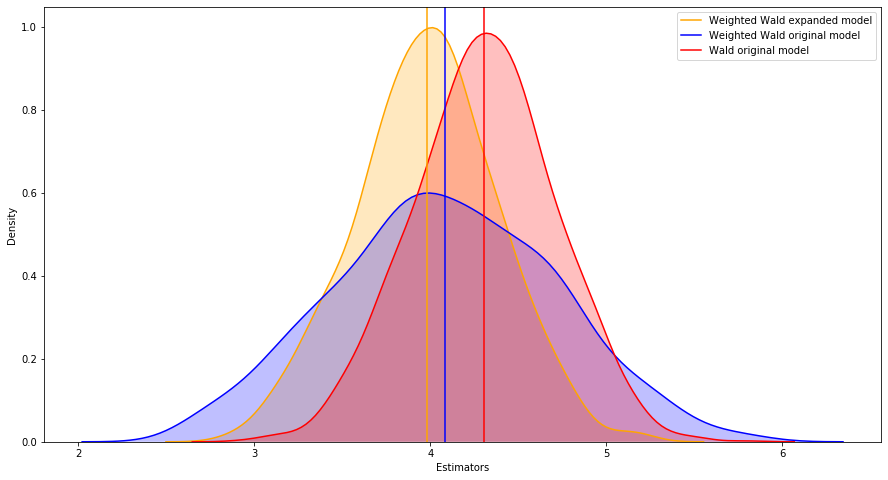

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize =(15,8))
ax = sns.kdeplot(weighted_wald_exp_bs, color = 'orange', label = 'Weighted Wald expanded model', shade = True)
ax = sns.kdeplot(weighted_wald_bs, color = 'blue', label = 'Weighted Wald original model', shade = True)
ax = sns.kdeplot(wald_bs, color = 'red', label = 'Wald original model', shade = True)

plt.axvline(x = np.mean(weighted_wald_exp_bs), color = 'orange')
plt.axvline(x = np.mean(weighted_wald_bs), color = 'blue')
plt.axvline(x = np.mean(wald_bs), color = 'red')

plt.xlabel('Estimators')
plt.ylabel('Density')

In [105]:
data.head()

,response,treatment,age,party
0,0,0,28.0,d
1,1,0,54.0,g
2,1,0,44.0,a
3,0,0,77.0,a
4,0,0,44.0,a


In [106]:
data.shape

(36501, 4)

In [116]:
data_dd.revenue.sum()

3559616.671172841

In [121]:
data_dd.compliance.sum()

6565

In [120]:
data_dd.treatment.sum()

100000